In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

2025-07-17 16:52:26.127374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752771146.485431      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752771146.583815      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os

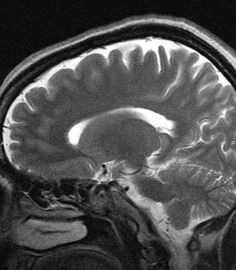

In [22]:
no_tumor_image = Image.open("/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(17).jpg")
no_tumor_image

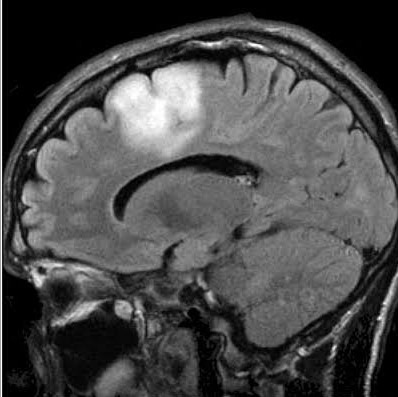

In [18]:
glioma_tumor_image = Image.open("/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(16).jpg")
glioma_tumor_image

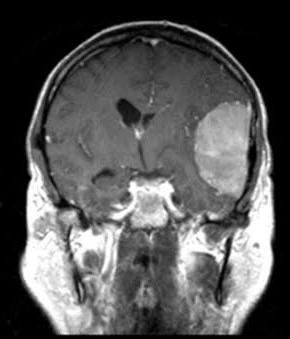

In [23]:
meningioma_tumor_image=Image.open("/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(125).jpg")
meningioma_tumor_image

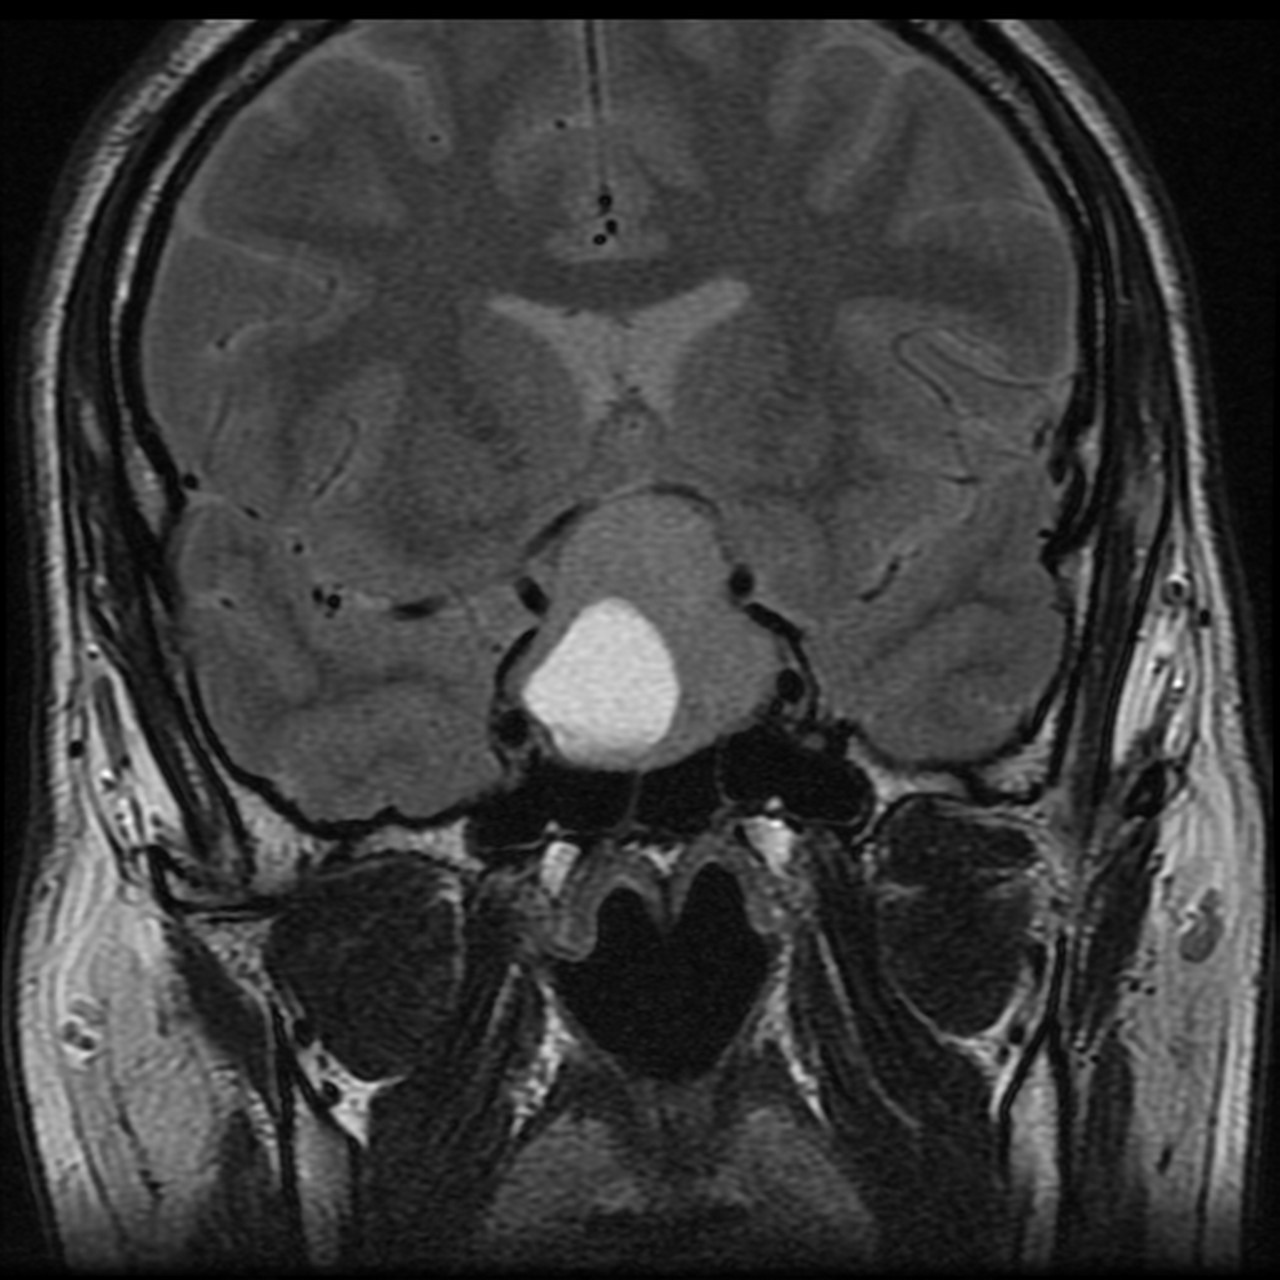

In [24]:
pituatary_image=Image.open("/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(15).jpg")
pituatary_image

**# FOLDER PATHS**(Here, we are mixing all the data into one entity, and then we will shuffle it)

In [39]:
X_train=[]
Y_train=[]
image_size=150
labels=["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

for i in labels:
    folderPath = os.path.join("/kaggle/input/brain-tumor-classification-mri/Training", i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join("/kaggle/input/brain-tumor-classification-mri/Testing", i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [40]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

**TRAIN TEST SPLIT**

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [47]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

**Creating a Convolutional Neural Network**

In [48]:
model = Sequential([Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)),
                    Conv2D(64, (3,3),activation='relu'),
                   MaxPooling2D(2,2),
                   Dropout(0.3),
                   Conv2D(64, (3,3),activation='relu'),
                   Conv2D(64, (3,3),activation='relu'),
                   Dropout(0.3),
                   MaxPooling2D(2,2),
                   Dropout(0.3),
                   Conv2D(128, (3,3),activation='relu'),
                   Conv2D(128, (3,3),activation='relu'),
                   Conv2D(128, (3,3),activation='relu'),
                   MaxPooling2D(2,2),
                   Dropout(0.3),
                   Conv2D(256, (3,3),activation='relu'),
                   Conv2D(256, (3,3),activation='relu'),
                   MaxPooling2D(2,2),
                   Dropout(0.3),
                   Flatten(),
                   Dense(512,activation='relu'),
                   Dense(512,activation='relu'),
                   Dropout(0.3),
                   Dense(4,activation='softmax')])

In [49]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 10, 10, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,889,540 (18.65 MB)

 Trainable params: 4,889,540 (18.65 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [54]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.2870 - loss: 3.5033 - val_accuracy: 0.3265 - val_loss: 1.3557
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.3603 - loss: 1.2832 - val_accuracy: 0.5306 - val_loss: 1.1038
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.5355 - loss: 1.1027 - val_accuracy: 0.6190 - val_loss: 1.0053
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.5626 - loss: 0.9693 - val_accuracy: 0.5612 - val_loss: 0.9105
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.6488 - loss: 0.8286 - val_accuracy: 0.6327 - val_loss: 0.7578
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.7020 - loss: 0.7150 - val_accuracy: 0.7449 - val_loss: 0.6365
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.7303 - loss: 0.6358 - val_accuracy: 0.6701 - val_loss: 0.8470
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.7122 - loss: 0.7042 - val_accuracy: 0.8129 - v

In [55]:
model.save('braintumordetection.h5')

**Plotting the accuracy and losses**

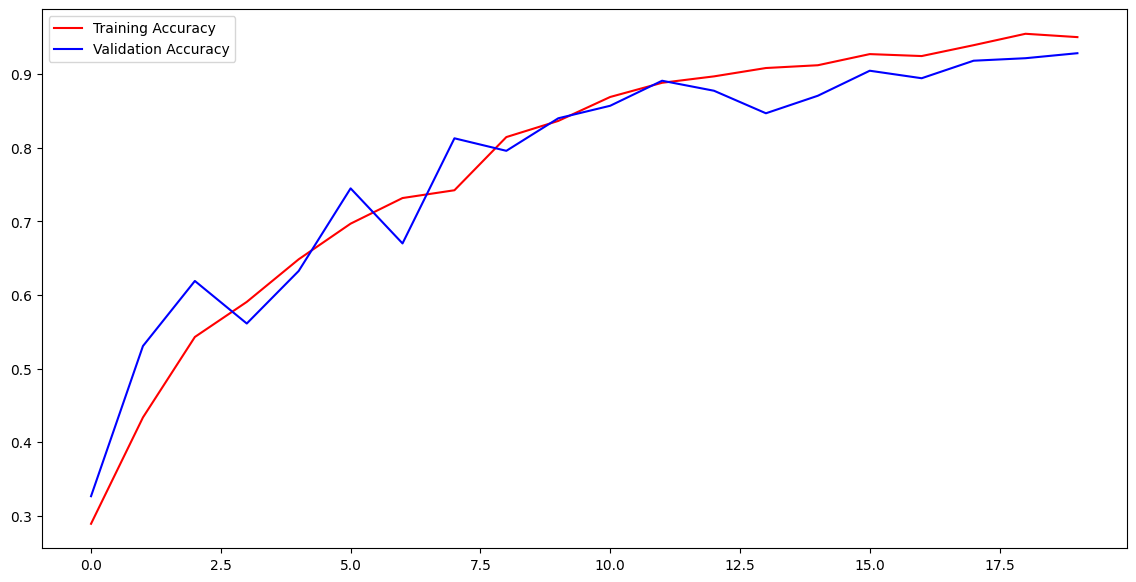

In [57]:
import matplotlib.pyplot as plt
import seaborn

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

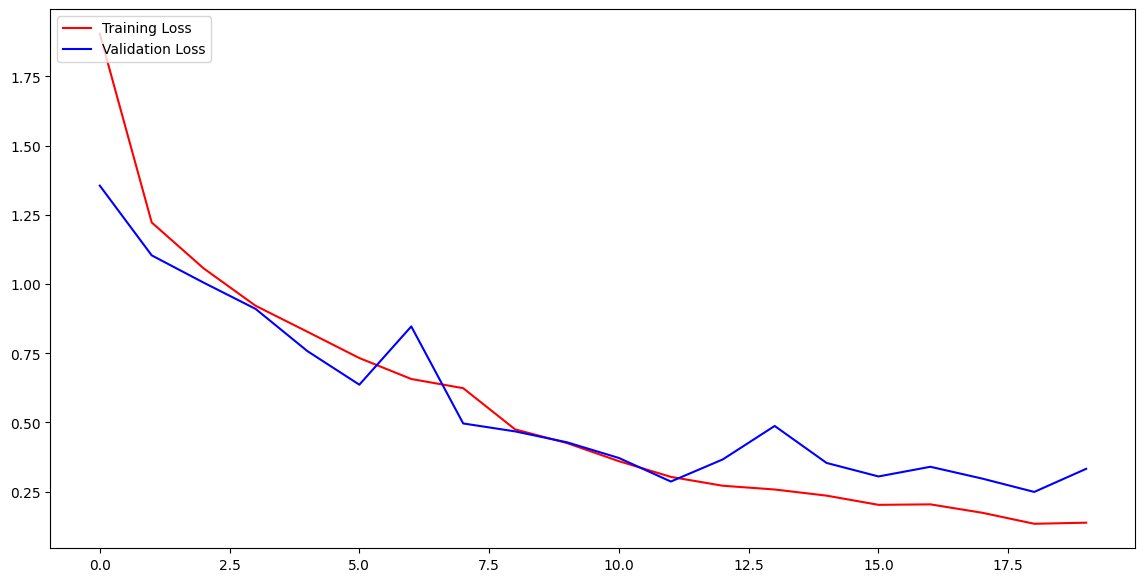

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.legend(loc='upper left')
plt.show()

**PREDICTION BY THE MODEL**

In [72]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(11).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape


(150, 150, 3)

In [73]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

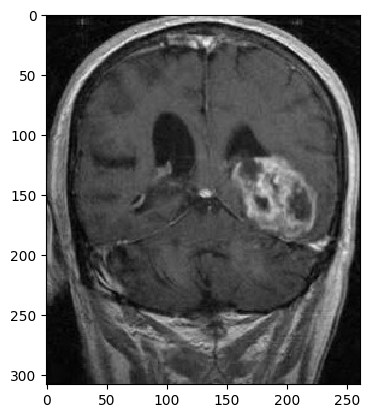

In [74]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(11).jpg')
plt.imshow(img,interpolation='nearest')

In [76]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


1